<a href="https://colab.research.google.com/github/eduardez/Machine-Learning-ESI/blob/master/Dengue_Task_2%20-%2026.8606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# just for the sake of this blog post!
from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load the provided data
train_features_raw = pd.read_csv('https://raw.githubusercontent.com/eduardez/Machine-Learning-ESI/master/dengue_features_train.csv?token=ANLXPWLSBAHLW7JMOAVKME276B3UC',
                             index_col=[0,1,2])

train_labels_raw = pd.read_csv('https://raw.githubusercontent.com/eduardez/Machine-Learning-ESI/master/dengue_labels_train.csv?token=ANLXPWJ55GZEX4IWHXQA3IS76B3WQ',
                           index_col=[0,1,2])

features_test_raw = pd.read_csv('https://raw.githubusercontent.com/eduardez/Machine-Learning-ESI/master/dengue_features_test.csv?token=ANLXPWOAY3AS6JWDRSIMHI276CDY6',
                           index_col=[0,1,2])

submission = pd.read_csv('https://raw.githubusercontent.com/eduardez/Machine-Learning-ESI/master/submission_format.csv?token=ANLXPWPCMTBVVHBSCUFJB5C76CEHE',
                           index_col=[0,1,2])

In [3]:
train_features = train_features_raw.copy()
train_labels = train_labels_raw.copy()

In [4]:
# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

In [5]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (936, 21)
labels  :  (936, 1)

Iquitos
features:  (520, 21)
labels  :  (520, 1)


In [6]:
# Remove `week_start_date` string.
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)

In [7]:
# Null check
print(pd.isnull(sj_train_features).sum())
print('--------------------------------')
print(pd.isnull(iq_train_features).sum())

ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_min_temp_c                         6
station_precip_mm                          6
dtype: int64
--------------------------------
ndvi_ne                                   3
ndvi_nw   

In [8]:
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

In [9]:
sj_train_features = sj_train_features.shift(periods = 6, fill_value = 0)
iq_train_features = iq_train_features.shift(periods = 3, fill_value = 0)

In [10]:
sj_train_features

ndvi_ne   ndvi_nw  ...  station_min_temp_c  station_precip_mm
year weekofyear                     ...                                       
1990 18          0.00000  0.000000  ...                 0.0                0.0
     19          0.00000  0.000000  ...                 0.0                0.0
     20          0.00000  0.000000  ...                 0.0                0.0
     21          0.00000  0.000000  ...                 0.0                0.0
     22          0.00000  0.000000  ...                 0.0                0.0
...                  ...       ...  ...                 ...                ...
2008 13          0.07200 -0.063100  ...                21.1                6.4
     14         -0.13865 -0.095067  ...                21.7               13.3
     15         -0.13865  0.015420  ...                21.1               12.9
     16         -0.08890 -0.090033  ...                21.1               13.0
     17         -0.32140 -0.141200  ...                22.2                4.4

[936 rows x 20 columns]

In [11]:
sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases

In [12]:
# compute the correlations
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

Text(0.5, 1.0, 'San Juan Variable Correlations')

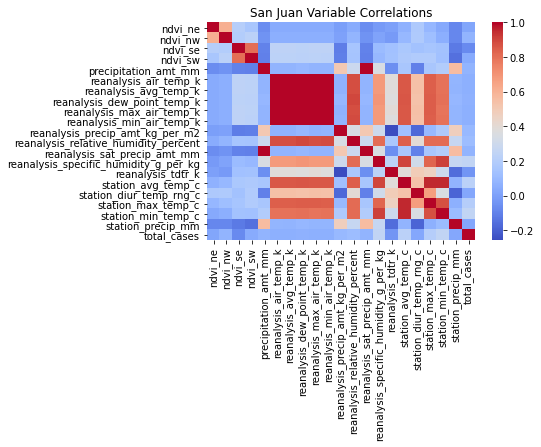

In [13]:
# plot san juan
sj_corr_heat = sns.heatmap(sj_correlations,cmap='coolwarm',xticklabels=True, yticklabels=True)
plt.title('San Juan Variable Correlations')

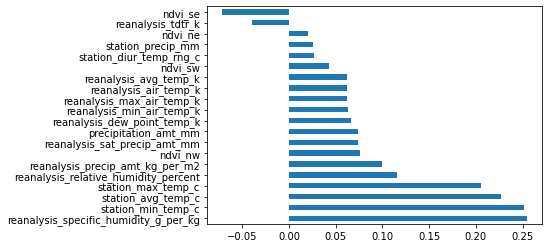

In [14]:
# San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

Text(0.5, 1.0, 'Iquitos Variable Correlations')

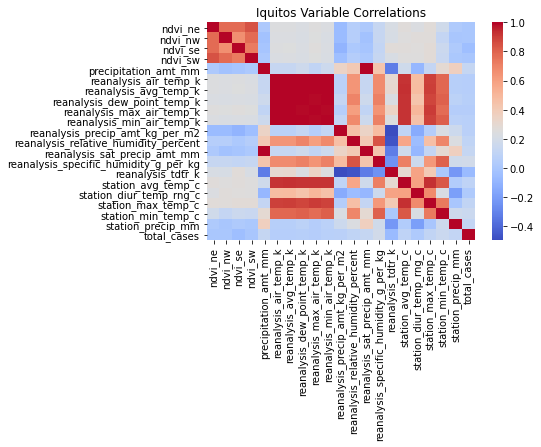

In [15]:
# plot iquitos
iq_corr_heat = sns.heatmap(iq_correlations,cmap='coolwarm',xticklabels=True, yticklabels=True)
plt.title('Iquitos Variable Correlations')

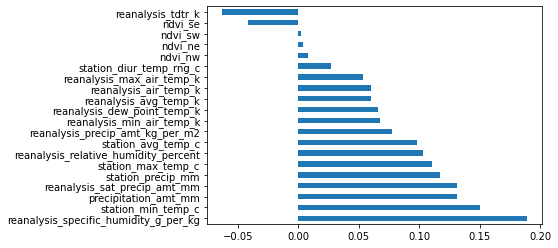

In [16]:
# Iquitos
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

In [17]:
def preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features we want
    features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 
                 'station_min_temp_c']
    df = df[features]
    
    # fill missing values
    df.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)
    
    # separate san juan and iquitos
    sj = df.loc['sj']
    iq = df.loc['iq']
    sj = sj.shift(periods = 6, fill_value = 0)
    iq = iq.shift(periods = 3, fill_value = 0)
    return sj, iq

In [18]:
sj_train, iq_train = preprocess_data('https://raw.githubusercontent.com/eduardez/Machine-Learning-ESI/master/dengue_features_train.csv?token=ANLXPWLSBAHLW7JMOAVKME276B3UC', labels_path="https://raw.githubusercontent.com/eduardez/Machine-Learning-ESI/master/dengue_labels_train.csv?token=ANLXPWJ55GZEX4IWHXQA3IS76B3WQ")

In [19]:
sj_train_subtrain = sj_train.head(800)
sj_train_subtest = sj_train.tail(sj_train.shape[0] - 800)

iq_train_subtrain = iq_train.head(400)
iq_train_subtest = iq_train.tail(iq_train.shape[0] - 400)

In [20]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "station_min_temp_c + " \
                    "station_avg_temp_c"
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model
    
sj_best_model = get_best_model(sj_train_subtrain, sj_train_subtest)
iq_best_model = get_best_model(iq_train_subtrain, iq_train_subtest)

best alpha =  1e-08
best score =  24.220588235294116
best alpha =  1e-08
best score =  6.85


In [21]:
sj_best_model = get_best_model(sj_train_subtrain, sj_train_subtest)
iq_best_model = get_best_model(iq_train_subtrain, iq_train_subtest)

best alpha =  1e-08
best score =  24.220588235294116
best alpha =  1e-08
best score =  6.85


In [22]:
sj_train_knn = sj_train.copy()
sj_train_knn.reset_index(drop = True, inplace = True)

iq_train_knn = iq_train.copy()
iq_train_knn.reset_index(drop = True, inplace = True)
"""
sj_train_subtrain_knn = sj_train.head(800)
sj_train_subtest_knn = sj_train.tail(sj_train.shape[0] - 800)

sj_train_subtrain_knn.reset_index(drop = True, inplace = True)
sj_train_subtest_knn.reset_index(drop = True, inplace = True)


iq_train_subtrain_knn = iq_train.head(400)
iq_train_subtest_knn = iq_train.tail(iq_train.shape[0] - 400)

iq_train_subtrain_knn.reset_index(drop = True, inplace = True)
iq_train_subtest_knn.reset_index(drop = True, inplace = True)
"""

'\nsj_train_subtrain_knn = sj_train.head(800)\nsj_train_subtest_knn = sj_train.tail(sj_train.shape[0] - 800)\n\nsj_train_subtrain_knn.reset_index(drop = True, inplace = True)\nsj_train_subtest_knn.reset_index(drop = True, inplace = True)\n\n\niq_train_subtrain_knn = iq_train.head(400)\niq_train_subtest_knn = iq_train.tail(iq_train.shape[0] - 400)\n\niq_train_subtrain_knn.reset_index(drop = True, inplace = True)\niq_train_subtest_knn.reset_index(drop = True, inplace = True)\n'

In [23]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = KFold(n_splits = 20, shuffle = False) #
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 

def knn(train_knn):
  for i, weights in enumerate(['uniform', 'distance']):
    total_scores = []
    for n_neighbors in range(1,10):
        fold_accuracy = []
        knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, metric='euclidean')
        # verificar cada uno de los modelos con validación cruzada.
        for train_fold, test_fold in cv.split(train_knn):
            # División train test aleatoria
            f_train = train_knn.loc[train_fold]
            f_test = train_knn.loc[test_fold]
            # entrenamiento y ejecución del modelo
            knn.fit( X = f_train.drop(['total_cases'], axis=1), 
                                y = f_train['total_cases'])
            y_pred = knn.predict(X = f_test.drop(['total_cases'], axis = 1))
            # evaluación del modelo
            mae = mean_absolute_error(f_test['total_cases'], y_pred)
            fold_accuracy.append(mae)
        total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
    
    plt.plot(range(1,len(total_scores)+1), total_scores, 
              marker='o', label=weights)
    print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
    plt.ylabel('MAE')

  plt.legend()
  plt.show() 





Min Value uniform : 29.942026415870078 (9)
Min Value distance : 30.161018960027103 (9)


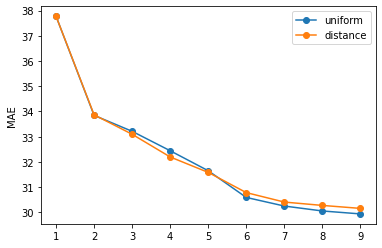

In [24]:
knn(sj_train_knn )

Min Value uniform : 7.008119658119658 (9)
Min Value distance : 6.998266292240805 (9)


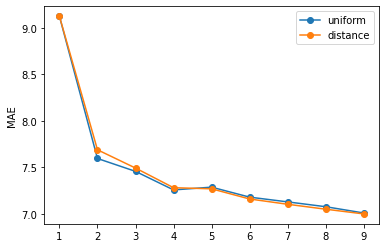

In [25]:
knn(iq_train_knn)

In [26]:
# constructor
n_neighbors = 10
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 
# fit and predict

knn.fit( X = sj_train.drop(['total_cases'], axis=1), y = sj_train_knn['total_cases'])
y_pred_sj = knn.predict(X = sj_train_knn.drop(['total_cases'], axis = 1))

mae = mean_absolute_error(sj_train_knn['total_cases'], y_pred_sj)
print ('MAE', mae)


MAE 25.70138888888889


In [27]:
# constructor
n_neighbors = 10
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 
# fit and predict

knn.fit( X = iq_train_knn.drop(['total_cases'], axis=1), y = iq_train_knn['total_cases'])
y_pred_iq = knn.predict(X = iq_train_knn.drop(['total_cases'], axis = 1))

mae = mean_absolute_error(iq_train_knn['total_cases'], y_pred_iq)
print ('MAE', mae)

MAE 6.079038461538461


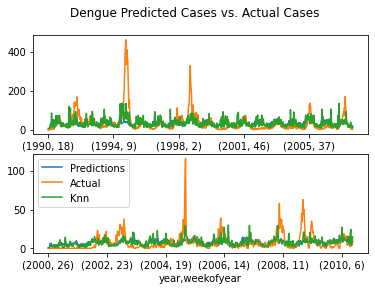

In [28]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
sj_train['fitted'] = sj_best_model.fittedvalues
sj_train.fitted.plot(ax=axes[0], label="Predictions")
sj_train.total_cases.plot(ax=axes[0], label="Actual")
axes[0].plot(y_pred_sj, label="Knn")

# plot iq
iq_train['fitted'] = iq_best_model.fittedvalues
iq_train.fitted.plot(ax=axes[1], label="Predictions")
iq_train.total_cases.plot(ax=axes[1], label="Actual")
axes[1].plot(y_pred_iq, label="Knn")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

In [29]:
sj_test, iq_test = preprocess_data('https://raw.githubusercontent.com/eduardez/Machine-Learning-ESI/master/dengue_features_test.csv?token=ANLXPWOAY3AS6JWDRSIMHI276CDY6')
"""
sj_predictions = ((knn.predict(sj_test) + sj_best_model.predict(sj_test))/2).astype(int)
iq_predictions = ((knn.predict(iq_test)+ iq_best_model.predict(iq_test))/2).astype(int)
"""
sj_predictions = knn.predict(sj_test).astype(int)
iq_predictions = knn.predict(iq_test).astype(int)

"""
sj_predictions = sj_best_model.predict(sj_test).astype(int)
iq_predictions = iq_best_model.predict(iq_test).astype(int)
"""
submission.total_cases = np.concatenate([sj_predictions, iq_predictions])

In [30]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

submission.to_csv("benchmark.csv")

Mounted at /content/gdrive
